# Calculate molecular fingerprint and Tanimoto similarity

In [33]:
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
import networkx as nx

In [28]:
basepath = 
inputfile = 'bace.csv'
outputfile = 'tanimoto.csv'

In [7]:
df = pd.read_csv(basepath + '\\' + inputfile, sep = ',', encoding = 'utf-8')
df

,smiles,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [9]:
df = df[['smiles', 'CID']]
df

,smiles,CID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5
...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546


In [29]:
df_smiles = df['smiles']

# make a list of mols
ms = [Chem.MolFromSmiles(x) for x in df_smiles]

# make a list of fingerprints (fp)
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=512) for x in ms]

# the list for the dataframe
qu, ta, sim = [], [], []

# compare all fp pairwise without duplicates
for n in range(len(fps)-1): 
    for m in range(n+1, len(fps)):
        s = DataStructs.TanimotoSimilarity(fps[n], fps[m]) 
        qu.append(df_smiles[n])
        ta.append(df_smiles[m])
        sim.append(s)

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'Similarity':sim}
df_final = pd.DataFrame(data=d)
df_final = df_final.sort_values('Similarity', ascending=False)
# save as csv
df_final.to_csv(basepath + '\\' + outputfile, index=False, sep=',')

                                                     query  \
1108961         Fc1cc(cnc1)-c1cc(ccc1)C1(N=C(N)C2N1CCCC2)C   
800896   Fc1ncccc1-c1cc(ccc1)C1([NH+]=C(N2C1=NCCC2)N)c1...   
598874   FC(F)Oc1ccc(cc1)[C@@]1(N=C(N)N(C)C1=O)c1cc(ccc...   
178581   O(C)c1cc(ccc1)-c1cc(ccc1)[C@]1(N=C(N)N(C)C(=O)...   
975817   Clc1ccc(nc1)C(=O)Nc1cc(ccc1)C1(N=C(N)C(=O)N(C1...   
...                                                    ...   
254447        [NH+]=1C(C=2N(CCCN=2)C=1N)(c1ccccc1)c1ccccc1   
336473                       s1cc(cc1)-c1cc2c(nc(N)cc2)cc1   
284853                                   n1c2c(ccc1N)cccc2   
254164        [NH+]=1C(C=2N(CCCN=2)C=1N)(c1ccccc1)c1ccccc1   
188245   S(CC[C@H](NC(=O)CCC(C)C)C(=O)N[C@H]([C@@H](O)C...   

                                                    target  Similarity  
1108961    Fc1cc(cnc1)-c1cc(ccc1)C1(N=C(N)[C@@H]2N1CCCC2)C         1.0  
800896   Fc1ncccc1-c1cc(ccc1)[C@@]1([NH+]=C(N2C1=NCCC2)...         1.0  
598874   FC(F)Oc1ccc(cc1)[C@@]1(N=C(

## Molecular graph from SMILES using RDKit

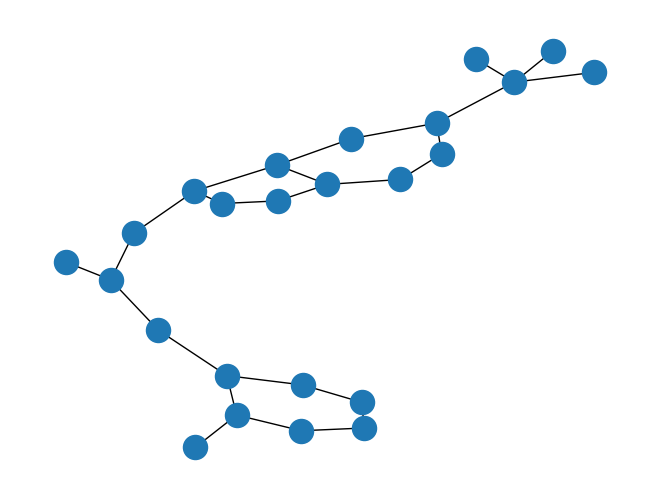

In [35]:
smiles = 'CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1'
mol = Chem.MolFromSmiles(smiles)

# Get adjacency matrix
adjacency_matrix = Chem.GetAdjacencyMatrix(mol, useBO = True)

# Convert adjacency matrix to NetworkX graph
G = nx.from_numpy_array(adjacency_matrix)
nx.draw(G)

## Molecular graph from SMILES using Pysmiles and NetworkX

In [ ]:
from pysmiles import read_smiles
import networkx as nx
    
smiles = 'C12=C3C4=C5C6=C1C7=C8C9=C1C%10=C%11C(=C29)C3=C2C3=C4C4=C5C5=C9C6=C7C6=C7C8=C1C1=C8C%10=C%10C%11=C2C2=C3C3=C4C4=C5C5=C%11C%12=C(C6=C95)C7=C1C1=C%12C5=C%11C4=C3C3=C5C(=C81)C%10=C23'
mol = read_smiles(smiles)
    
# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol))

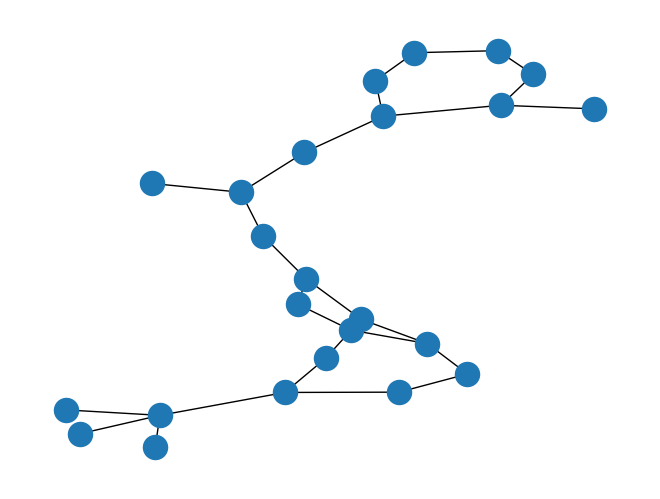

In [38]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   formal_charge=atom.GetFormalCharge(),
                   chiral_tag=atom.GetChiralTag(),
                   hybridization=atom.GetHybridization(),
                   num_explicit_hs=atom.GetNumExplicitHs(),
                   is_aromatic=atom.GetIsAromatic())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
    return G

smiles = 'CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1'
mol = Chem.MolFromSmiles(smiles)

G = mol_to_nx(mol)
nx.draw(G)

# Community detection

In [39]:
df = pd.read_csv(basepath + '\\' + outputfile, sep = ',', encoding = 'utf-8')
df

,query,target,Similarity
0,Fc1cc(cnc1)-c1cc(ccc1)C1(N=C(N)C2N1CCCC2)C,Fc1cc(cnc1)-c1cc(ccc1)C1(N=C(N)[C@@H]2N1CCCC2)C,1.0
1,Fc1ncccc1-c1cc(ccc1)C1([NH+]=C(N2C1=NCCC2)N)c1...,Fc1ncccc1-c1cc(ccc1)[C@@]1([NH+]=C(N2C1=NCCC2)...,1.0
2,FC(F)Oc1ccc(cc1)[C@@]1(N=C(N)N(C)C1=O)c1cc(ccc...,FC(F)Oc1ccc(cc1)[C@@]1(N=C(N)N(C)C1=O)c1cc(ccc...,1.0
3,O(C)c1cc(ccc1)-c1cc(ccc1)[C@]1(N=C(N)N(C)C(=O)...,O(C)c1cc(ccc1)-c1cc(ccc1)C1(N=C(N)N(C)C(=O)C1)C,1.0
4,Clc1ccc(nc1)C(=O)Nc1cc(ccc1)C1(N=C(N)C(=O)N(C1...,Clc1ccc(nc1)C(=O)Nc1cc(ccc1)[C@@]1(N=C(N)C(=O)...,1.0
...,...,...,...
1143823,[NH+]=1C(C=2N(CCCN=2)C=1N)(c1ccccc1)c1ccccc1,S(CCC(NC(=O)C(NC(=O)C)C)C(=O)NC(C(O)CC(C(=O)NC...,0.0
1143824,s1cc(cc1)-c1cc2c(nc(N)cc2)cc1,S(CCC(NC(=O)C(NC(=O)C)C)C(=O)NC(C(O)CC(C(=O)NC...,0.0
1143825,n1c2c(ccc1N)cccc2,S(CCC(NC(=O)C(NC(=O)C)C)C(=O)NC(C(O)CC(C(=O)NC...,0.0
1143826,[NH+]=1C(C=2N(CCCN=2)C=1N)(c1ccccc1)c1ccccc1,S(CCC(NC(=O)C(NC(=O)C)C(C)C)C(=O)NC(C(O)CC(C(=...,0.0


In [40]:
G = nx.Graph()


for index, row in df.iterrows():
    source_node = row['query']
    target_node = row['target']
    weight = row['Similarity']
    G.add_edge(source_node, target_node, weight=weight)

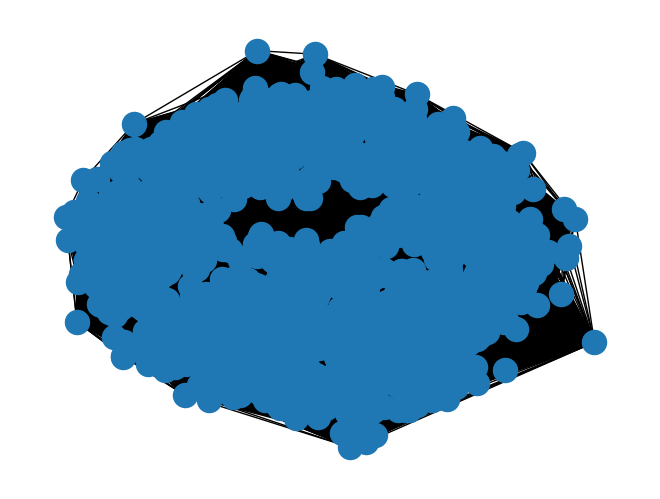

In [41]:
nx.draw(G)

In [43]:
import networkx.algorithms.community as nx_comm
communities = nx_comm.louvain_communities(G, seed=10)
print(len(communities))
print(len(communities[0]))
print(len(communities[1]))
print(len(communities[2]))

3
681
710
122
